In [25]:
from pylab import *
import io

In [43]:
def getData():
    Data = []
#     with io.open(csv, encoding='utf-8', errors='ignore') as f:
# shutil.copyfileobj(source, target)
    with io.open(dataPath, mode='rt', encoding='utf-8') as f:
        reader = csv.reader(f)
        for row in reader:
            #row = re.split(r'\t+',row[0])
            Data.append([float(row[0]),float(row[1])])
            
    f = open(configPath,'r')
    
    [eps,MinPts] = parse(f.readline())
    
    print (eps,MinPts)
    
    return [Data,eps,MinPts]

def parse(line):
    data = line.split(" ")
    return [int(data[0]),int(data[1])]
    
            

In [44]:
class cluster:
    """Cluster model as a class"""
    
    pList = []
    X = []
    Y = []
    name = ""
    
    def __init__(self,name):
        self.name = name
        self.pList = []
        self.X = []
        self.Y = []
    
    def addPoint(self,point):
        self.pList.append(point)
        self.X.append(point[0])
        self.Y.append(point[1])

    def getPoints(self):
        return self.pList
    
    def erase(self):
        self.pList = []
    
    def getX(self):
        return self.X
    
    def getY(self):
        return self.Y
    
    def has(self,point):
        
        if point in self.pList:
            return True
        
        return False
        
    def printPoints(self):
        print (self.name+' Points:')
        print ('-----------------')
        print (self.pList)
        print (len(self.pList))
        print ('-----------------')

In [46]:
class dbscanner:
    
    dataSet = []
    count = 0
    visited = []
    member = []
    Clusters = []
    
    def dbscan(self, D, eps, MinPts):
#       Treating the dbscanner as a class
        self.dataSet = D
        
        title(r'DBSCAN Algorithm', fontsize=18)
        xlabel(r'Dim 1',fontsize=17)
        ylabel(r'Dim 2', fontsize=17)

        C = -1
        
#       Just instantiating a new cluster called noise
        Noise = cluster('Noise')
        
        for point in D:
#           self.visited stores points already visited
            if point not in self.visited:
                self.visited.append(point)
            
#               Get all the points that respect the  epsilon criteria relative to point
                NeighbourPoints = self.regionQuery(point,eps)
                
                if len(NeighbourPoints) < MinPts:
                    Noise.addPoint(point)
                else:
                    name = 'Cluster'+str(self.count);
                    C = cluster(name)
                    self.count+=1;
                    """Cluster model as a class"""
                    self.expandCluster(point,NeighbourPoints,C,eps,MinPts)
                    
                    plot(C.getX(),C.getY(),'o',label=name)
                    
#                   hold is a command using for hold the appearance of the chart
                    hold(True)
        
        if len(Noise.getPoints())!=0:
            plot(Noise.getX(),Noise.getY(),'x',label='Noise')
            
        hold(False)
        legend(loc='lower left')
        grid(True)
        show()
            
    def expandCluster(self,point,NeighbourPoints,C,eps,MinPts):
        """Expand recursively the neighborhood of p 
        allocating or not the the neighbors to the
        C cluster depending on eps and MinPts"""
        
#       Add point being expanded to the cluster that has just been created 
        C.addPoint(point)
        
        for p in NeighbourPoints:
            """Even with the regionQuery not treating the case of comparing p with itself, 
               the p will be in the in the self.visited list"""
            if p not in self.visited:
                self.visited.append(p)
                np = self.regionQuery(p,eps)
                if len(np) >= MinPts:
                    for n in np:
                        if n not in NeighbourPoints:
#                           Expand nodes that respect MinPts criteria as well
                            NeighbourPoints.append(n)
    
#           Verify if p is already present in another cluster
            for c in self.Clusters:
                if not c.has(p):
                    if not C.has(p):
                        C.addPoint(p)
            
#           One of the initial cases where self.Clusters is empty
            if len(self.Clusters) == 0:
                if not C.has(p):
                    C.addPoint(p)

        self.Clusters.append(C)
                
    def regionQuery(self, P, eps):
        """return all the points that respect the epsilon criteria"""
        result = []
        for d in self.dataSet:
            if (((d[0]-P[0])**2 + (d[1] - P[1])**2)**0.5)<=eps:
                result.append(d)
        return result
  

(3, 2)


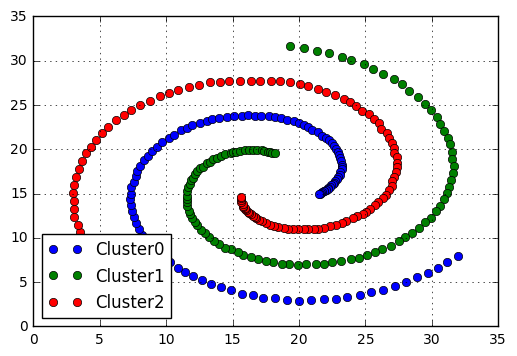

In [47]:
import csv
import re
import os

dir = os.getcwd()

configPath = dir + r"\config.txt"
dataPath = dir + r"/abc.csv"

def main():
    [Data,eps,MinPts]= getData()
    dbc = dbscanner()
    dbc.dbscan(Data, eps, MinPts)
        
main()    